# Tarea5_Analisis de datos 

## Jhon Stiven Luna Nunez	

### Regresion lineal

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [193]:
#Cargar dataset

df = pd.read_csv('Titanic-Dataset.csv')

In [195]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [37]:
#Analisis exploratorio

In [199]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [49]:
#Identificacion de valores atipicos

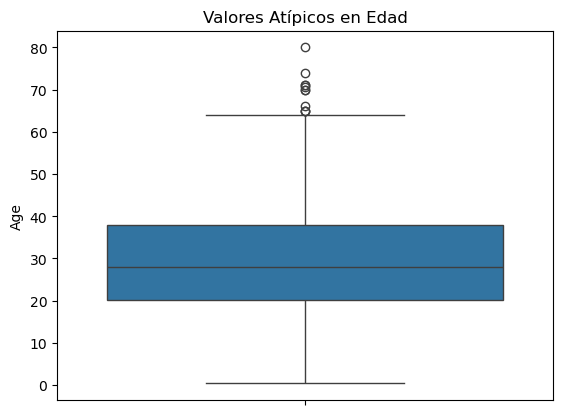

In [201]:
sns.boxplot(data=df, y='Age')
plt.title("Valores Atípicos en Edad")
plt.show()

In [203]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Valores atípicos:")
print(outliers)

Valores atípicos:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
3

In [ ]:
#Tendencias

In [205]:
avg_age_by_gender = df.groupby('Sex')['Age'].mean()
print(avg_age_by_gender)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [131]:
avg_age_by_class = df.groupby('Pclass')['Age'].mean()
print(avg_age_by_class)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


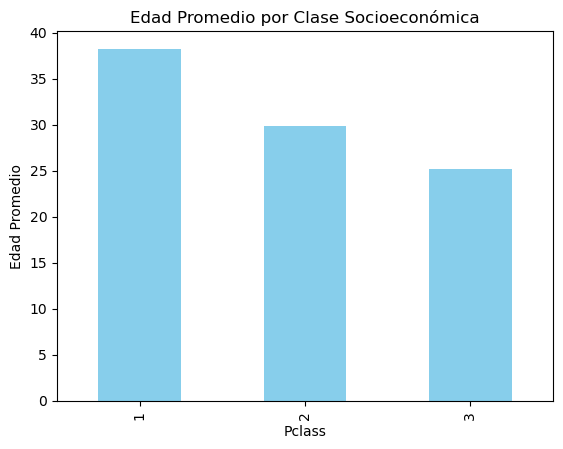

In [133]:
avg_age_by_class.plot(kind='bar', color='skyblue')
plt.title("Edad Promedio por Clase Socioeconómica")
plt.ylabel("Edad Promedio")
plt.show()

In [88]:
#Seleccion de caracteristicas


In [211]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [213]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  


In [215]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Codificar género
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Codificar puerto de embarque

# Actualizar las características después de codificación
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


Intercepto (β0): 0.14754098360655726
Coeficiente (Tamaño, β1): [0.53374557]


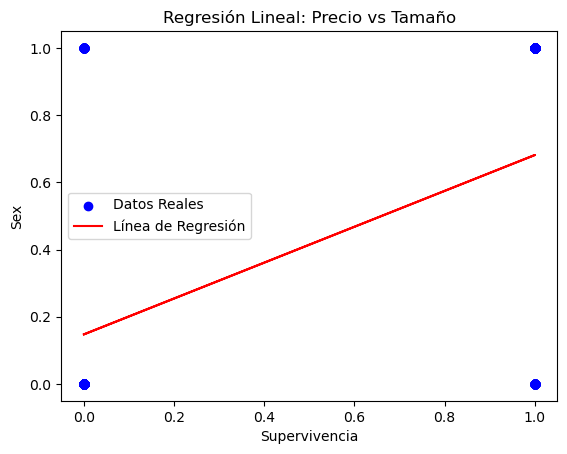

In [225]:

# Variables independientes (Tamaño y Habitaciones) y dependiente (Precio)
X = df[['Survived']]
y = df['Sex']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Tamaño y Habitaciones)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Tamaño, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Survived'], y, color='blue', label='Datos Reales')
plt.plot(df['Survived'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio vs Tamaño')
plt.xlabel('Supervivencia')
plt.ylabel('Sex')
plt.legend()
plt.show()

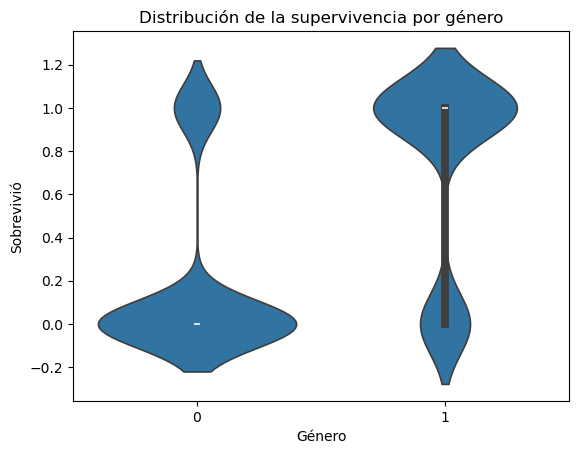

In [227]:
sns.violinplot(x='Sex', y='Survived', data=df)

# Personalizar el gráfico
plt.title('Distribución de la supervivencia por género')
plt.xlabel('Género')
plt.ylabel('Sobrevivió')
plt.show()

Intercepto (β0): 1.0871164618421385
Coeficientes:
  Pclass: -0.19680799861532186
  Age: -0.006436820369729334
  SibSp: -0.04123965322700658
  Parch: 0.05498392095013604
  Fare: 0.0005632684290054479
  Embarked_Q: 0.037814979023339135
  Embarked_S: -0.11063439012460016


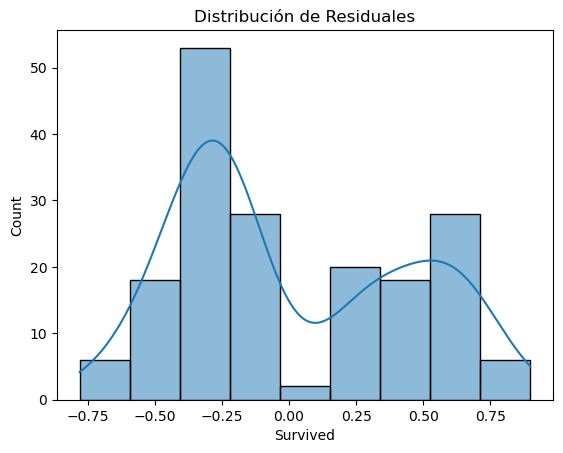

In [265]:

df.rename(columns=lambda x: x.strip(), inplace=True)

# Codificar la columna 'Sex' (si es necesario)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Ya se ha realizado la codificación de 'Embarked', por lo que utilizamos las columnas 'Embarked_Q' y 'Embarked_S'

# Seleccionar las características y la variable objetivo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Dividir los datos en características (X) y objetivo (y)
X = df[features]
y = df[target]

# Manejo de valores faltantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

beta_0 = modelo.intercept_
beta = modelo.coef_

print(f"Intercepto (β0): {beta_0}")
print("Coeficientes:")
for feature, coef in zip(features, beta):
    print(f"  {feature}: {coef}")


residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribución de Residuales")
plt.show()

In [ ]:
#Analisis de los resultados 



##### A continuacion realizamos un analisis de los coeficientes, donde cada uno de ellos muestra la influencia que se tiene de las diferentes variables sobre la que se queire saber que es si se sobrevivio o no.

##### Pclass: El coeficiente es negativo (-0.196)
##### Edad: el coeficiente es negativo(-0.006)
##### SibSp y Parch: Su valor es bajo y negativo. 
##### Tarifa: Su coeficiente es positivo (0.005)
##### Embarcado:Son positivos